# Ejercicio de machine learning: clasificación y regresión vinícola

En este ejercicio (mucho menos guiado que los anteriores) vas a tener dos objetivos. Para ello, utilizarás un dataset sobre distintos vinos con sus características (como pueden ser la acidez, densidad...). Tendrás que generar, entrenar, validar y testear modelos tanto de clasificación como de regresión.

El dataset proviene de la Universdad de Minho, generado por [P. Cortez](http://www3.dsi.uminho.pt/pcortez/Home.html) et al. Dicho dataset se encuentra en el [*UC Irvine Machine Learning Repository*](https://archive.ics.uci.edu/ml/index.html) ([aquí](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) está disponible; pero debes usar la versión adjunta en la misma carpeta que este documento). Adjunto la descripción del dataset:

```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo. Dicho esto, los objetivos son:

1. Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...
2. Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).
3. Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

El fichero csv a utilizar `winequality.csv` tiene las cabeceras de cuál es cada variable, y los datos están separados por punto y coma.

Siéntete libre de hacer todo el análisis exploratorio y estadístico (así como gráficos) que quieras antes de lanzarte a hacer modelos.

Y nada más. ¡Ánimo!

# Empezamos

## Descargamos librerias + descarga

In [49]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass



from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression



%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
from sklearn import preprocessing
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.datasets import make_classification


from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier

import xgboost as xgb
from sklearn.svm import LinearSVC
import sklearn.exceptions

from sklearn.model_selection import StratifiedKFold


In [2]:
winequality = pd.read_csv('winequality.csv', sep=';')

## Dividimos el Dataset para la regresión y la classificación

In [3]:
winequality_classification = winequality.copy()
winequality_regression = winequality.copy()

In [4]:
del winequality_regression['color']

# Clasificación

## Entendemos los datos que tenemos (EDA)

In [5]:
winequality.iloc[:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
6493,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
6494,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white
6495,7.00,0.24,0.36,4.9,0.083,10.0,133.0,0.99420,3.33,0.37,10.8,6,white


In [6]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white


In [8]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


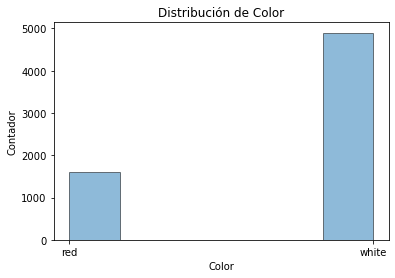

In [9]:
plt.hist(winequality.color,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribución de Color')
plt.xlabel('Color')
plt.ylabel('Contador')
plt.show()

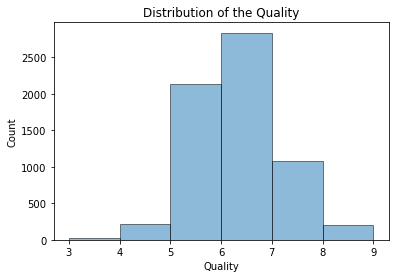

In [10]:
plt.hist(winequality.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Podemos observar que el dataset está desbalanceado por la gran diferencia entre los dos tipos de vino.
Casi 5000 de blanco y 1500 de rojo, lo que implica que bien podemos trabajarlos por separado o juntos teniendo en cuenta este tipo de desbalance de cara a entender la calidad.

### Estadística Descriptiva - Clasificación

In [11]:
subset_attributes = winequality_classification.columns
rs = round(winequality_classification.loc[winequality_classification.color == 'red', subset_attributes].describe(),2)
ws = round(winequality_classification.loc[winequality_classification.color == 'white', subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Vino Rojo', 'Vino Blanco']).T

Vino Rojo                                           \
                         count   mean    std   min    25%    50%    75%   
fixed acidity           1599.0   8.32   1.74  4.60   7.10   7.90   9.20   
volatile acidity        1599.0   0.53   0.18  0.12   0.39   0.52   0.64   
citric acid             1599.0   0.27   0.19  0.00   0.09   0.26   0.42   
residual sugar          1599.0   2.54   1.41  0.90   1.90   2.20   2.60   
chlorides               1599.0   0.09   0.05  0.01   0.07   0.08   0.09   
free sulfur dioxide     1599.0  15.87  10.46  1.00   7.00  14.00  21.00   
total sulfur dioxide    1599.0  46.47  32.90  6.00  22.00  38.00  62.00   
density                 1599.0   1.00   0.00  0.99   1.00   1.00   1.00   
pH                      1599.0   3.31   0.15  2.74   3.21   3.31   3.40   
sulphates               1599.0   0.66   0.17  0.33   0.55   0.62   0.73   
alcohol                 1599.0  10.42   1.07  8.40   9.50  10.20  11.10   
quality                 1599.0   5.64   0.81  3.00   5.00   6.00   6.00   

                             Vino Blanco                                       \
                         max       count    mean    std   min     25%     50%   
fixed acidity          15.90      4898.0    6.85   0.84  3.80    6.30    6.80   
volatile acidity        1.58      4898.0    0.28   0.10  0.08    0.21    0.26   
citric acid             1.00      4898.0    0.33   0.12  0.00    0.27    0.32   
residual sugar         15.50      4898.0    6.39   5.07  0.60    1.70    5.20   
chlorides               0.61      4898.0    0.05   0.02  0.01    0.04    0.04   
free sulfur dioxide    72.00      4898.0   35.31  17.01  2.00   23.00   34.00   
total sulfur dioxide  289.00      4898.0  138.36  42.50  9.00  108.00  134.00   
density                 1.00      4898.0    0.99   0.00  0.99    0.99    0.99   
pH                      4.01      4898.0    3.19   0.15  2.72    3.09    3.18   
sulphates               2.00      4898.0    0.49   0.11  0.22    0.41    0.47   
alcohol                14.90      4898.0   10.51   1.23  8.00    9.50   10.40   
quality                 8.00      4898.0    5.88   0.89  3.00    5.00    6.00   

                                      
                         75%     max  
fixed acidity           7.30   14.20  
volatile acidity        0.32    1.10  
citric acid             0.39    1.66  
residual sugar          9.90   65.80  
chlorides               0.05    0.35  
free sulfur dioxide    46.00  289.00  
total sulfur dioxide  167.00  440.00  
density                 1.00    1.04  
pH                      3.28    3.82  
sulphates               0.55    1.08  
alcohol                11.40   14.20  
quality                 6.00    9.00

### Inferencia Estadística - Clasificación

In [12]:
def type_inf_stat_test(feature):
    F, p = f_oneway(winequality_classification[winequality_classification.color == 'red'][feature], 
                    winequality_classification[winequality_classification.color == 'white'][feature])
    if p <= 0.05:
        msg = 'Rechazar'
    else:
        msg = 'Aceptar'
    print('F Estadístico: {:.2f} \tp-value: {:.3f} \tHipothesis Nula: {}'.format(F, p, msg))

In [13]:
print('ANOVA test para todos los samples de vino con distintos colores:\n')
type_inf_stat_test('residual sugar')
type_inf_stat_test('total sulfur dioxide')
type_inf_stat_test('sulphates')
type_inf_stat_test('fixed acidity')
type_inf_stat_test('volatile acidity')
type_inf_stat_test('citric acid')
type_inf_stat_test('chlorides')
type_inf_stat_test('pH')

ANOVA test para todos los samples de vino con distintos colores:

F Estadístico: 899.77 	p-value: 0.000 	Hipothesis Nula: Rechazar
F Estadístico: 6252.80 	p-value: 0.000 	Hipothesis Nula: Rechazar
F Estadístico: 2021.71 	p-value: 0.000 	Hipothesis Nula: Rechazar
F Estadístico: 2016.51 	p-value: 0.000 	Hipothesis Nula: Rechazar
F Estadístico: 4829.32 	p-value: 0.000 	Hipothesis Nula: Rechazar
F Estadístico: 236.39 	p-value: 0.000 	Hipothesis Nula: Rechazar
F Estadístico: 2315.83 	p-value: 0.000 	Hipothesis Nula: Rechazar
F Estadístico: 789.05 	p-value: 0.000 	Hipothesis Nula: Rechazar


La hipótesis alternativa, HA, nos dice que existen al menos dos medias de grupo que son estadísticamente significativamente diferentes entre sí. Por lo general, la estadística F y el valor p asociado se utilizan para determinar la significancia estadística. Por lo general, un valor de p inferior a 0,05 se considera un resultado estadísticamente significativo cuando rechazamos la hipótesis nula a favor de la original.

### Correlación - Clasificación

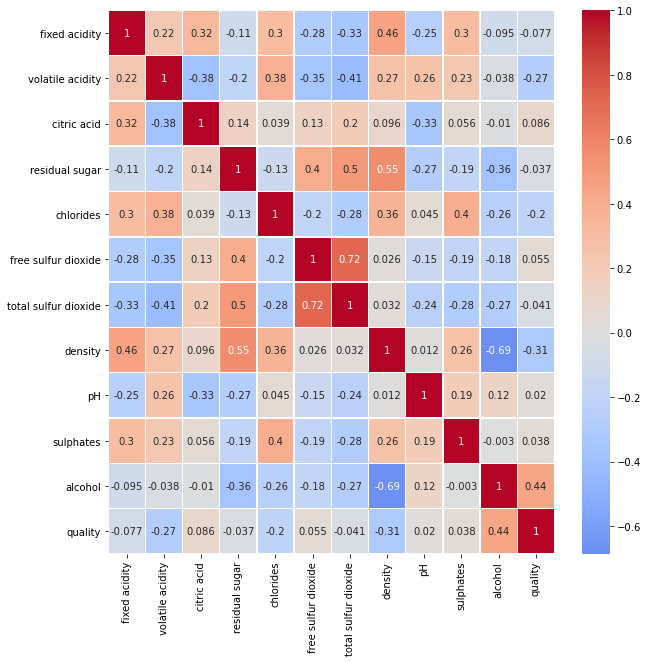

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(winequality.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

Casi todos las correlaciones son debiles debemos de destacar algunos cómo:
- Density con residual sugar --> Podría estar relacionado también con el color
- Alcohol con density --> Relacionada indirectamente de forma negativa con el residual sugar

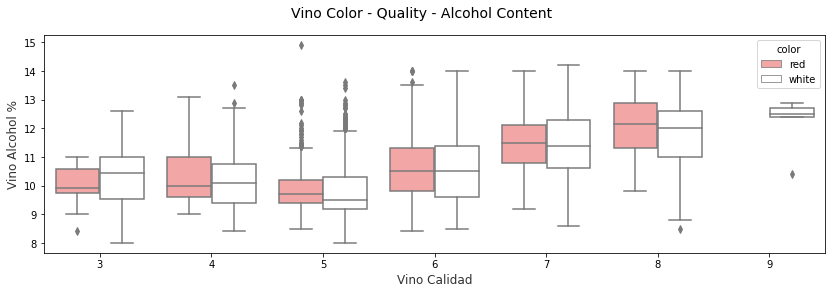

In [15]:
f, (ax1) = plt.subplots(1, figsize=(14, 4))
f.suptitle('Vino Color - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol', hue='color', data=winequality_classification, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Vino Calidad",size = 12,alpha=0.8)
ax1.set_ylabel("Vino Alcohol %",size = 12,alpha=0.8)

plt.show()

A más alcohol --> más calidad (opinamos borrachos?) 

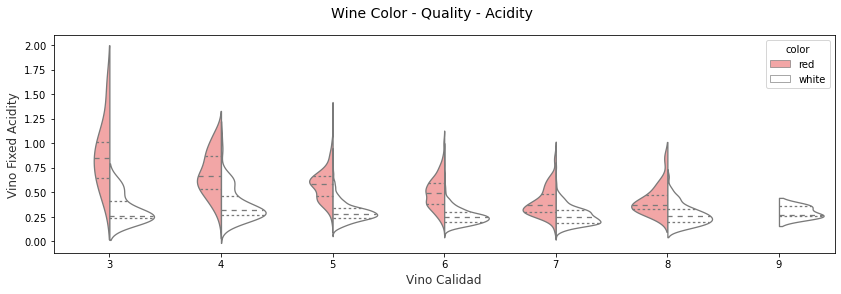

In [16]:
f, (ax1) = plt.subplots(1, figsize=(14, 4))
f.suptitle('Wine Color - Quality - Acidity', fontsize=14)

sns.violinplot(x='quality', y='volatile acidity', hue='color', data=winequality_classification, split=True, inner='quart', linewidth=1.3,
               palette={'red': '#FF9999', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Vino Calidad",size = 12,alpha=0.8)
ax1.set_ylabel("Vino Fixed Acidity",size = 12,alpha=0.8)
plt.show()

La acidez decrece con la calidad y por lo que el vino rojo es el que tiene más acidez

In [17]:
class_tp = preprocessing.LabelEncoder()
y_tp = class_tp.fit_transform(winequality.color.values)
winequality['color'] = y_tp

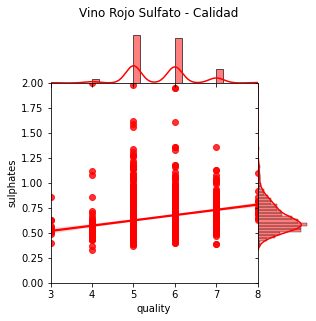

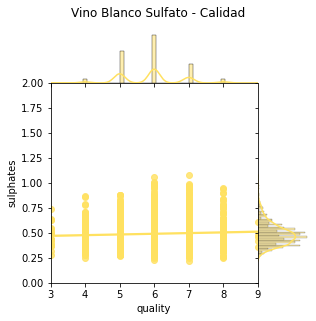

In [18]:
r = sns.jointplot(x='quality', y='sulphates', data=winequality[winequality.color == 0],
                  kind='reg', ylim=(0, 2), color='red', space=0, size=4.5, ratio=4)
r.ax_joint.set_xticks(list(range(3,9)))
rfig = r.fig 
rfig.subplots_adjust(top=0.9)
t = rfig.suptitle('Vino Rojo Sulfato - Calidad', fontsize=12)

w = sns.jointplot(x='quality', y='sulphates', data=winequality[winequality.color == 1],
                   kind='reg', ylim=(0, 2), color='#FFE160', space=0, size=4.5, ratio=4)
w.ax_joint.set_xticks(list(range(3,10)))
wfig = w.fig 
wfig.subplots_adjust(top=0.9)
t = wfig.suptitle('Vino Blanco Sulfato - Calidad', fontsize=12)

Vemos que esta tendencia es causada por una mayor concentración en calidad media, y vemos claramente que los niveles de sulfato para el vino tinto son mucho más altos en comparación con los del vino blanco.

### Correlación - Regresión

In [19]:
winequality_regression.corr()['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

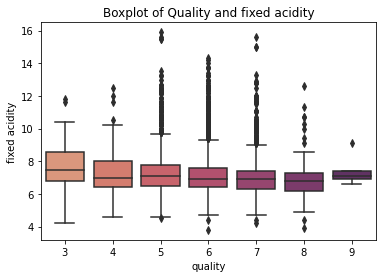

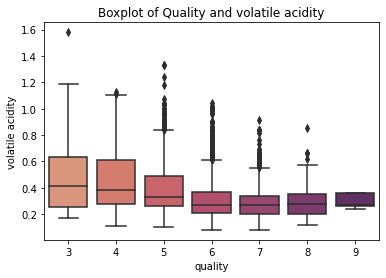

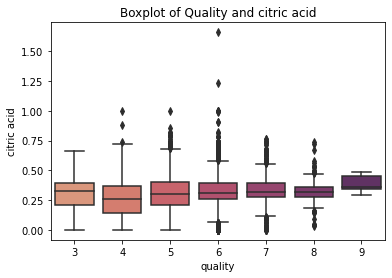

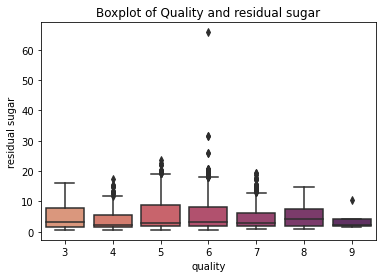

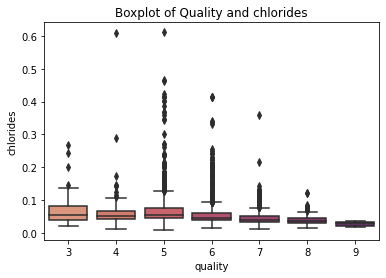

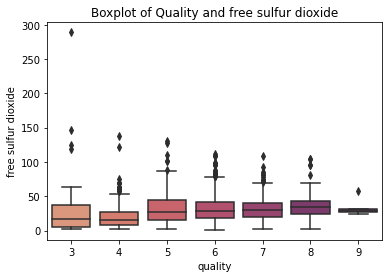

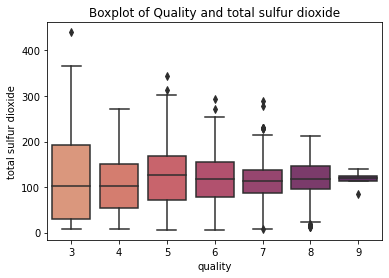

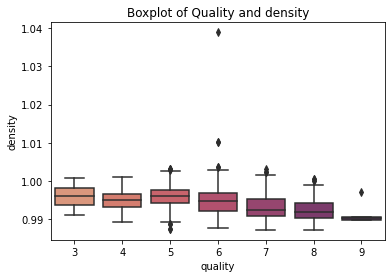

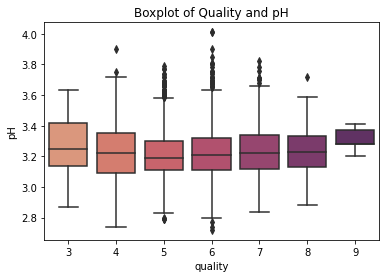

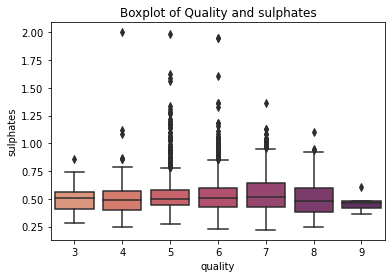

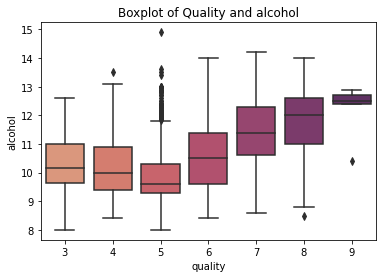

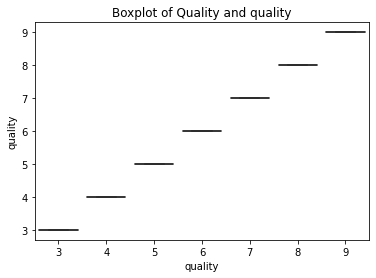

In [20]:
for column in winequality_regression:
    sns.boxplot(x='quality',y=winequality_regression[column],data=winequality_regression,palette='flare')
    plt.title(f"Boxplot of Quality and {winequality_regression[column].name}")
    plt.show()

## Data Engineering

### Elevado skewed variables

In [21]:
winequality_numerics_only = winequality.select_dtypes(include=np.number)

skewed_features = winequality_numerics_only.apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' :skewed_features})   

skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("Existen {} mayor skew de los numéricos al transformar en box cox".format(skewness.shape[0]))

l_opt = {}

for feat in skewness.index:
    winequality_numerics_only[feat], l_opt[feat] = boxcox((winequality_numerics_only[feat]+1))

skewed_features2 = winequality_numerics_only[skewness.index].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)


skewness2 = pd.DataFrame({'Nuevo Skew' :skewed_features2})   
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))

Existen 7 mayor skew de los numéricos al transformar en box cox


,Skew,Nuevo Skew
chlorides,5.398581,0.188756
sulphates,1.796855,0.010097
fixed acidity,1.722892,-0.062778
volatile acidity,1.494751,0.113297
residual sugar,1.435073,0.136535
free sulfur dioxide,1.219784,-0.036864
color,-1.178823,-1.178823


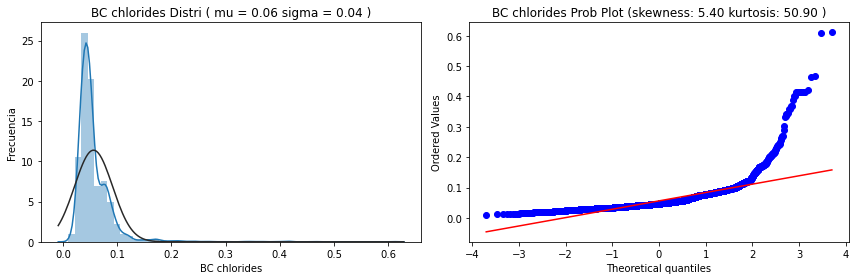

None


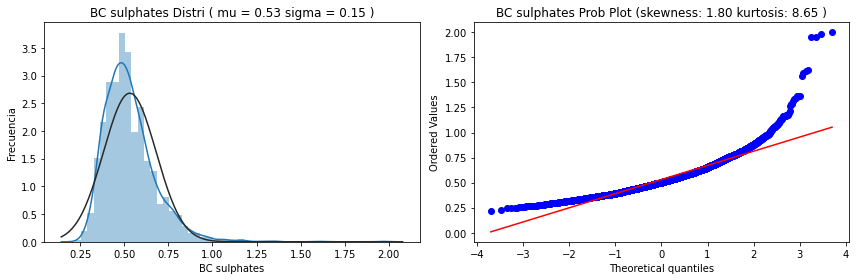

None


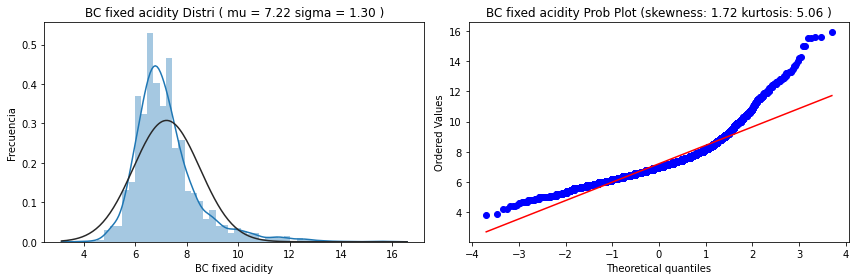

None


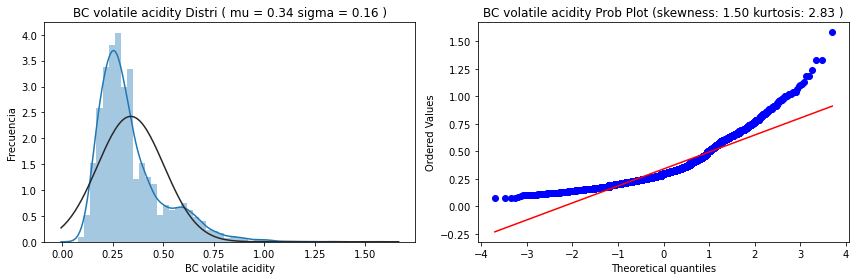

None


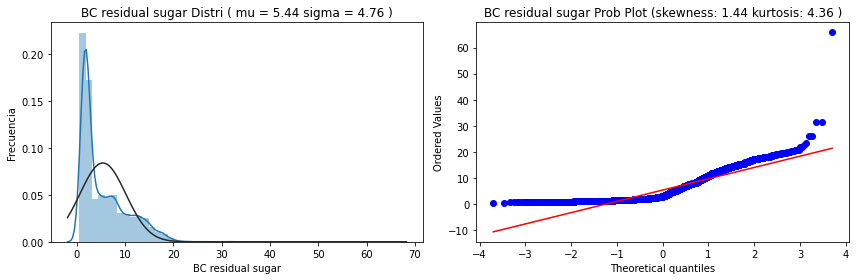

None


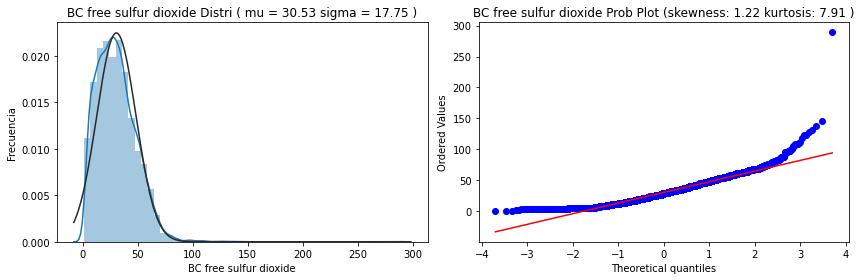

None


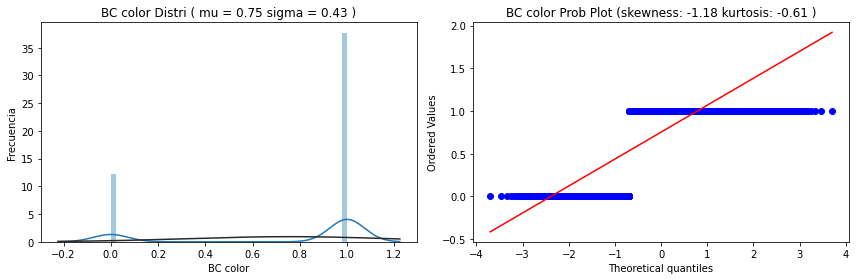

None


In [22]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(12,4))

    (mu, sigma) = norm.fit(data)

    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distri ( mu = {:.2f} sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frecuencia')

    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Prob Plot (skewness: {:.2f} kurtosis: {:.2f} )'.\
                   format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()
    
for feat in skewness.index:
    print(QQ_plot(winequality[feat], ('BC {}'.format(feat))))

### Multicollinearity

In [23]:
winequality = winequality.sample(frac=1, random_state=101).reset_index(drop=True)

In [24]:
winequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.8,0.28,0.44,11.5,0.040,58.0,223.0,0.99690,3.22,0.56,9.500000,5,1
1,6.2,0.37,0.30,6.6,0.346,79.0,200.0,0.99540,3.29,0.58,9.600000,5,1
2,6.8,0.21,0.74,1.2,0.047,25.0,111.0,0.99160,3.13,0.41,10.700000,6,1
3,7.9,0.64,0.46,10.6,0.244,33.0,227.0,0.99830,2.87,0.74,9.100000,3,1
4,9.1,0.30,0.41,2.0,0.068,10.0,24.0,0.99523,3.27,0.85,11.700000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.1,0.59,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.400000,5,0
6493,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.600000,6,1
6494,7.0,0.36,0.32,10.5,0.045,35.0,135.0,0.99350,3.09,0.33,11.600000,8,1
6495,6.7,0.41,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,12.893333,7,1


### Feature Selection

In [25]:
class select_fetaures(object): # BaseEstimator, TransformerMixin, 
    def __init__(self, select_cols):
        self.select_cols_ = select_cols
    
    def fit(self, X, Y ):
        pass

    def transform(self, X):
        return X.loc[:, self.select_cols_]    

    def fit_transform(self, X, Y):
        self.fit(X, Y)
        df = self.transform(X)
        return df    

    def __getitem__(self, x):
        return self.X[x], self.Y[x]

### PCA

Queremos poder saber hasta que punto podemos reducir la dimensionalidad del dataset sin perder calidad de la información:

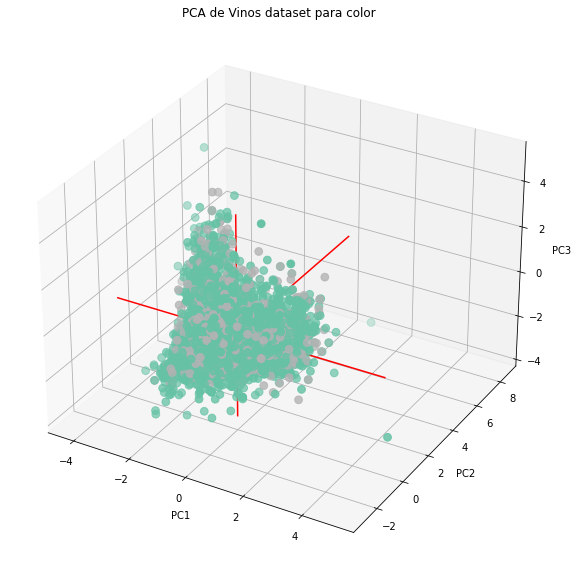

KNeighbors Classifier Training Accuracy: 95.32%
KNeighbors Classifier Test Accuracy: 70.87%
________________________________________

Accurance on color  Predicción pornúmero de componentes de PCA :



,Var_ratio,Train_Acc,Test_Acc
Components,,,
9,97.631577,0.953816,0.717949
5,79.731533,0.953376,0.717436
10,99.701538,0.953816,0.715897
3,64.364015,0.953156,0.712821
7,90.008537,0.953376,0.712308
8,94.567722,0.953376,0.712308
6,85.252548,0.953376,0.711282
4,73.187216,0.953376,0.710769
2,50.215406,0.953376,0.700513


In [26]:
def pca_analysis(df, y_train, feat):
    scale = StandardScaler()
    df = pd.DataFrame(scale.fit_transform(df), index=df.index)
    pca_all = PCA(random_state=101, whiten=True).fit(df)

    my_color=y_train

    result=pd.DataFrame(pca_all.transform(df), columns=['PCA%i' % i for i in range(df.shape[1])], index=df.index)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA de Vinos dataset para " + (feat))
    plt.show()

    X_train , X_test, y, y_test = train_test_split(df , y_train, test_size=0.3, random_state=0)

    KNC = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance')
    KNC = KNC.fit(X_train, y)
    print('KNeighbors Classifier Training Accuracy: {:2.2%}'.format(accuracy_score(y, KNC.predict(X_train))))
    y_pred = KNC.predict(X_test)
    print('KNeighbors Classifier Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

    print('_' * 40)
    print('\nAccurance on', feat, ' Predicción pornúmero de componentes de PCA :\n')
    AccPca = pd.DataFrame(columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc'])

    for componets in np.arange(1, df.shape[1]):
        variance_ratio = sum(pca_all.explained_variance_ratio_[:componets])*100
        pca = PCA(n_components=componets, random_state=101, whiten=True)
        X_train_pca = pca.fit_transform(X_train)
        Components = X_train_pca.shape[1]
        KNC = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance')
        KNC = KNC.fit(X_train_pca, y)
        Training_Accuracy = accuracy_score(y, KNC.predict(X_train_pca))
        X_test_pca = pca.transform(X_test)
        y_pred = KNC.predict(X_test_pca)
        Test_Accuracy = accuracy_score(y_test, y_pred)
        AccPca = AccPca.append(pd.DataFrame([(Components, variance_ratio, Training_Accuracy, Test_Accuracy)],
                                            columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc']))#], axis=0)

    AccPca.set_index('Components', inplace=True)
    display(AccPca.sort_values(by='Test_Acc', ascending=False))

cols = winequality.columns
cols = list(cols.drop(['color', 'quality']))
pca_analysis(winequality.loc[:, cols], y_tp, 'color')


## Modeling - Clasificación

Creamos una serie de funcones para poder obtener los resultados para cada modelo probado de una forma más ágil, lo he intentado con un loop pero me sigue costando mucho ese paso, así que este step lo dejo cómo Back log.

In [27]:
def get_results(model, name, data, true_labels, target_names = ['red', 'white'], results=None, reasume=False):

    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(wtp_dnn_model.history.history['val_acc'])
        predicted_labels = model.predict_classes(data) 
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        param = gs.best_params_
        best = gs.best_score_
        predicted_labels = model.predict(data).ravel()
        if hasattr(model, 'predict_proba'):
            im_model = InMemoryModel(model.predict_proba, examples=data, target_names=target_names)
        elif hasattr(clf, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    y_pred = model.predict(data).ravel()
    
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    #interpreter = Interpretation(data, feature_names=cols)
    #plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return results

In [28]:
def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc


In [29]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return prob, y_score, roc_auc

In [33]:
cols = winequality.columns
cols = list(cols.drop(['color']))
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(winequality.loc[:, cols].values, y_tp, test_size=0.20, random_state=101)

In [34]:
def metricas_reg(modelo,X=X_test_reg,y=y_test_reg):
  salida={}
  salida["RMSE"]=np.sqrt(mse(y_true=y,y_pred=modelo.predict(X)))
  salida["MAE"]=mae(y_true=y,y_pred=modelo.predict(X))
  salida["R2"]=r2_score(y_true=y,y_pred=modelo.predict(X))
  return salida

### Logistic Regression

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 456 candidates, totalling 2280 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2198 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 2249 out of 2280 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2280 out of 2280 | elapsed:    6.2s finished


Mean Best Accuracy: 75.18%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.003, 'clf__class_weight': None, 'clf__penalty': 'l1', 'clf__solver': 'liblinear', 'clf__tol': 0.001, 'pca__n_components': 10, 'pca__whiten': True}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  76.23% 
Precision: 58.11% 
Recall:    76.23% 
F1 Score:  65.95% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.00      0.00      0.00       309
       white       0.76      1.00      0.87       991

    accuracy                           0.76      1300
   macro avg       0.38      0.50      0.43      1300
weighted avg       0.58      0.76      0.66      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red            0   30

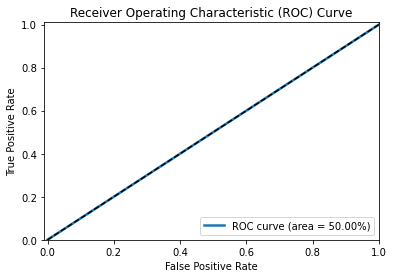

In [35]:
clf = Pipeline([
        ('pca', PCA(random_state = 101)),
        ('clf', LogisticRegression(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [10, 12]
whiten = [True] #, False]
C =  [0.003, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.0001] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]

param_grid =\
    [{'clf__C': C
     ,'clf__solver': ['liblinear', 'saga'] 
     ,'clf__penalty': ['l1', 'l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced']
     ,'pca__n_components' : n_components
     ,'pca__whiten' : whiten
},
    {'clf__C': C
     ,'clf__max_iter': [3, 9, 2, 7, 4]
     ,'clf__solver': ['newton-cg', 'sag', 'lbfgs']
     ,'clf__penalty': ['l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced'] 
     ,'pca__n_components' : n_components
     ,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
LR = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ]) 

LR.fit(X_train_reg,y_train_reg)

results = get_results(LR, 'LogisticRegression', X_test_reg, y_test_reg, reasume=True)

In [36]:
print(metricas_reg(LR,X_test_reg,y_test_reg))

{'RMSE': 0.48753698084587155, 'MAE': 0.2376923076923077, 'R2': -0.31180625630676073}


### Decision Tree

In [37]:
target_names = ['red', 'white']

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.5s finished


Mean Best Accuracy: 73.87%
------------------------------------------------------------
Best Parameters:
{'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__min_samples_leaf': 5, 'clf__splitter': 'best'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  74.54% 
Precision: 63.77% 
Recall:    74.54% 
F1 Score:  66.37% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.24      0.03      0.06       309
       white       0.76      0.97      0.85       991

    accuracy                           0.75      1300
   macro avg       0.50      0.50      0.45      1300
weighted avg       0.64      0.75      0.66      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red           10   299
        white         32   

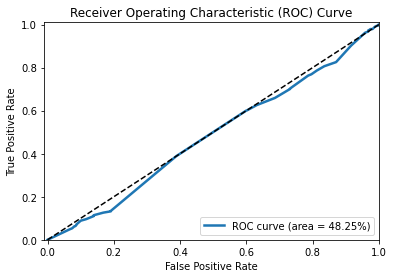

In [38]:
clf = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] # [15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid =\
    [{ 'clf__class_weight': class_weight
      ,'clf__criterion': criterion
      ,'clf__splitter': splitter
      ,'clf__max_depth': max_depth
      ,'clf__min_samples_leaf': min_samples_leaf
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
DT = Pipeline([
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

DT.fit(X_train_reg,y_train_reg)

results = get_results(DT, 'DT First', X_test_reg, y_test_reg, target_names = target_names, reasume=True)

In [39]:
print(metricas_reg(DT,X_test_reg,y_test_reg))

{'RMSE': 0.5045942772320993, 'MAE': 0.25461538461538463, 'R2': -0.40520346549364983}


### Random Classifier 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.1s finished


Mean Best Accuracy: 72.58%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_split': 4, 'clf__n_estimators': 175}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  73.38% 
Precision: 63.60% 
Recall:    73.38% 
F1 Score:  66.37% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.23      0.05      0.08       309
       white       0.76      0.95      0.84       991

    accuracy                           0.73      1300
   macro avg       0.50      0.50      0.46      1300
weighted avg       0.64      0.73      0.66      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red           16   293
        white         53   938


              ROC 

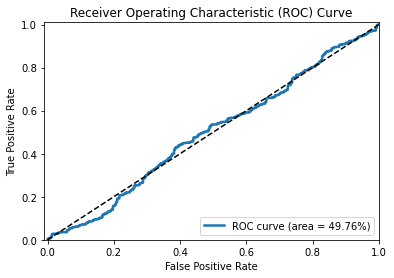

In [40]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', RandomForestClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] #, 3, 4, 5, 10] # 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1] #, 2 , 3]

param_grid =\
    [{ #'clf__class_weight': class_weight
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      #,'clf__min_samples_leaf': min_samples_leaf
      #,'pca__n_components' : n_components
      #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
RF = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

RF.fit(X_train_reg,y_train_reg)

results = get_results(RF, 'RF', X_test_reg, y_test_reg, 
                      target_names = target_names, results = results, reasume=False)

In [41]:
print(metricas_reg(RF,X_test_reg,y_test_reg))

{'RMSE': 0.5159010042186836, 'MAE': 0.26615384615384613, 'R2': -0.4688833808483468}


### KNeighbors Classifier

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished


Mean Best Accuracy: 70.75%
------------------------------------------------------------
Best Parameters:
{'clf__algorithm': 'ball_tree', 'clf__leaf_size': 12, 'clf__n_neighbors': 13, 'clf__p': 1, 'clf__weights': 'distance'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  71.38% 
Precision: 64.34% 
Recall:    71.38% 
F1 Score:  66.70% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.26      0.11      0.15       309
       white       0.76      0.90      0.83       991

    accuracy                           0.71      1300
   macro avg       0.51      0.50      0.49      1300
weighted avg       0.64      0.71      0.67      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red           33   276
        white         96   895


      

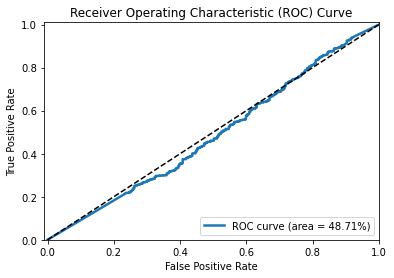

In [42]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', KNeighborsClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]

param_grid =\
    [{'clf__n_neighbors': [10, 11, 12, 13] 
     ,'clf__weights': ['distance'] 
     ,'clf__algorithm' : ['ball_tree'] #, 'brute', 'auto',  'kd_tree', 'brute']
     ,'clf__leaf_size': [12, 11, 13]
     ,'clf__p': [1] 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

KNNC = Pipeline([
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

KNNC.fit(X_train_reg,y_train_reg)

results = get_results(KNNC, 'KNeighborsClassifier', X_test_reg, y_test_reg, 
                      target_names = target_names, results = results, reasume=False)

In [43]:
print(metricas_reg(KNNC,X_test_reg,y_test_reg))

{'RMSE': 0.5349334969450372, 'MAE': 0.28615384615384615, 'R2': -0.5792619007964885}


### Gradient Boosting for Classification

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished


Mean Best Accuracy: 71.95%
------------------------------------------------------------
Best Parameters:
{'clf__learning_rate': 0.01, 'clf__max_depth': 10, 'clf__n_estimators': 400}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  73.85% 
Precision: 64.42% 
Recall:    73.85% 
F1 Score:  66.75% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.26      0.06      0.09       309
       white       0.76      0.95      0.85       991

    accuracy                           0.74      1300
   macro avg       0.51      0.50      0.47      1300
weighted avg       0.64      0.74      0.67      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red           17   292
        white         48   943


              ROC AUC Score: 50.33%


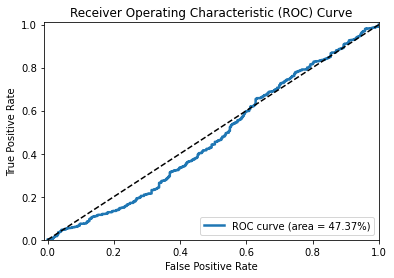

In [44]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', GradientBoostingClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
#cv=None, dual=False,  scoring=None, refit=True,  multi_class='ovr'
SEL = cols
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
learning_rate =  [1e-02] #, 5e-03, 2e-02]
n_estimators= [400]
max_depth = [10]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': learning_rate
     ,'clf__max_depth': max_depth
     ,'clf__n_estimators' : n_estimators 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

GBC = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

GBC.fit(X_train_reg,y_train_reg)

results = get_results(GBC, 'GradientBoostingClassifier', X_test_reg, y_test_reg, 
                      target_names = target_names, results = results, reasume=False)

In [45]:
print(metricas_reg(GBC,X_test_reg,y_test_reg))

{'RMSE': 0.5114083119567588, 'MAE': 0.26153846153846155, 'R2': -0.44341141470646805}


### AdaBoost classifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.0s finished


Mean Best Accuracy: 75.02%
------------------------------------------------------------
Best Parameters:
{'clf__algorithm': 'SAMME.R', 'clf__learning_rate': 0.15, 'clf__n_estimators': 600}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  75.85% 
Precision: 64.62% 
Recall:    75.85% 
F1 Score:  66.18% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.27      0.01      0.02       309
       white       0.76      0.99      0.86       991

    accuracy                           0.76      1300
   macro avg       0.52      0.50      0.44      1300
weighted avg       0.65      0.76      0.66      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red            3   306
        white          8   983


              ROC AUC Score: 50.08%


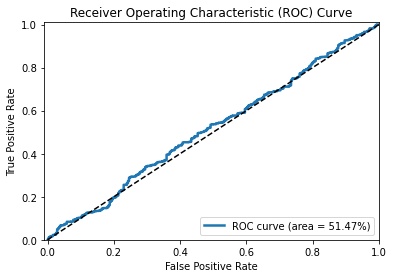

In [46]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', AdaBoostClassifier(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     #,'lda__n_components': n_comp
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

ADAB = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ])  

ADAB.fit(X_train_reg,y_train_reg)

results = get_results(ADAB, 'AdaBoostClassifier', X_test_reg, y_test_reg, 
                      target_names = target_names, results = results, reasume=False)

In [47]:
print(metricas_reg(ADAB,X_test_reg,y_test_reg))

{'RMSE': 0.4914656259988704, 'MAE': 0.24153846153846154, 'R2': -0.3330328947583263}


### Support Vector Machine

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


Mean Best Accuracy: 53.86%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.07, 'clf__dual': True, 'clf__loss': 'hinge', 'clf__max_iter': 15, 'clf__penalty': 'l2', 'clf__tol': 1e-06}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  53.92% 
Precision: 64.97% 
Recall:    53.92% 
F1 Score:  57.31% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.25      0.48      0.33       309
       white       0.77      0.56      0.65       991

    accuracy                           0.54      1300
   macro avg       0.51      0.52      0.49      1300
weighted avg       0.65      0.54      0.57      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red          147   162
        white        437   554


     

[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.2s finished


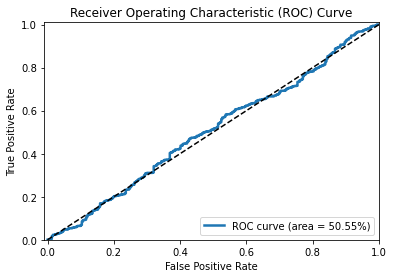

In [50]:
clf = Pipeline([
        ('pca', PCA(random_state = 101)),
        ('clf', LinearSVC(random_state=101, multi_class='ovr', class_weight='balanced'))])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
C =  [0.06, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
tol = [1e-06]
max_iter = [10, 15, 9]

param_grid =\
    [{'clf__loss': ['hinge']
     ,'clf__tol': tol
     ,'clf__C': C
     ,'clf__penalty': ['l2']
     ,'clf__max_iter' : max_iter
     ,'clf__dual' : [True]
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }
    ,{'clf__loss': ['squared_hinge']
     ,'clf__tol': tol
     ,'clf__C': C
     ,'clf__penalty': ['l2', 'l1']
     ,'clf__max_iter' : max_iter
     ,'clf__dual' : [False]
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

LSVC = Pipeline([
        ('scl', StandardScaler()),
        #('lda', LDA(n_components = 2, store_covariance=True)),
        ('gs', gs)
 ])  

LSVC.fit(X_train_reg,y_train_reg)

results = get_results(LSVC, 'LinearSVC', X_test_reg, y_test_reg, 
                      target_names = target_names, results = results, reasume=False)

In [51]:
print(metricas_reg(LSVC,X_test_reg,y_test_reg))

{'RMSE': 0.6787998458818555, 'MAE': 0.46076923076923076, 'R2': -1.5429512864975714}


## Essemble learning

### Bagging

In [52]:
Rf=RandomForestClassifier(n_estimators=500,max_depth=4,bootstrap=True,max_samples=0.8,verbose=2,random_state=42,n_jobs=-1)

In [53]:
Rf.fit(X_train_reg,y_train_reg)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 500building tree 2 of 500
building tree 3 of 500

building tree 4 of 500
building tree 5 of 500building tree 6 of 500

building tree 7 of 500
building tree 8 of 500building tree 9 of 500
building tree 10 of 500

building tree 11 of 500
building tree 12 of 500
building tree 13 of 500building tree 14 of 500
building tree 15 of 500

building tree 16 of 500
building tree 17 of 500
building tree 18 of 500building tree 19 of 500building tree 20 of 500
building tree 21 of 500
building tree 22 of 500

building tree 23 of 500building tree 24 of 500
building tree 25 of 500


building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500building tree 31 of 500

building tree 32 of 500
building tree 33 of 500
building tree 34 of 500building tree 35 of 500

building tree 36 of 500building tree 37 of 500

building tree 38 of 500
building tree 39 of 500building tree 40 of 500

building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.1s


building tree 259 of 500

building tree 260 of 500
building tree 261 of 500
building tree 262 of 500building tree 263 of 500
building tree 264 of 500

building tree 265 of 500
building tree 266 of 500
building tree 267 of 500
building tree 268 of 500
building tree 269 of 500
building tree 270 of 500building tree 271 of 500

building tree 272 of 500
building tree 273 of 500
building tree 274 of 500building tree 275 of 500

building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500building tree 284 of 500

building tree 285 of 500
building tree 286 of 500
building tree 287 of 500building tree 288 of 500

building tree 289 of 500building tree 290 of 500

building tree 291 of 500
building tree 292 of 500building tree 293 of 500

building tree 294 of 500
building tree 295 of 500
building tree 296 of 500building tree 297 of 500

building tree 298 of 500

[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    0.4s


building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500building tree 403 of 500
building tree 404 of 500

building tree 405 of 500building tree 406 of 500

building tree 407 of 500building tree 408 of 500

building tree 409 of 500building tree 410 of 500building tree 411 of 500

building tree 412 of 500
building tree 413 of 500

building tree 414 of 500building tree 415 of 500

building tree 416 of 500building tree 417 of 500

building tree 418 of 500building tree 419 of 500

building tree 420 of 500building tree 421 of 500

building tree 422 of 500building tree 423 of 500

building tree 424 of 500
building tree 425 of 500building tree 426 of 500

building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500building tree 431 of 500

building tree 432 of 500building tree 433 of 500

building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500building tree 438 of 500



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished


RandomForestClassifier(max_depth=4, max_samples=0.8, n_estimators=500,
                       n_jobs=-1, random_state=42, verbose=2)

In [54]:
print(Rf.score(X_train_reg,y_train_reg))
print(Rf.score(X_test_reg,y_test_reg))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished


0.751779873003656
0.7623076923076924


### Boosting

In [55]:
estimador_base=LogisticRegression()
Gb=GradientBoostingClassifier(init=estimador_base,learning_rate=0.1,n_estimators=300,max_depth=2,random_state=1,verbose=2)

In [56]:
Gb.fit(X_train_reg,y_train_reg)

      Iter       Train Loss   Remaining Time 
         1           1.1181            1.50s
         2           1.1173            1.64s
         3           1.1166            1.59s
         4           1.1160            1.56s
         5           1.1156            1.54s
         6           1.1146            1.57s
         7           1.1141            1.55s
         8           1.1136            1.53s
         9           1.1130            1.55s
        10           1.1127            1.54s
        11           1.1119            1.53s
        12           1.1110            1.54s
        13           1.1106            1.52s
        14           1.1102            1.51s
        15           1.1095            1.50s
        16           1.1090            1.51s
        17           1.1085            1.50s
        18           1.1079            1.49s
        19           1.1076            1.48s
        20           1.1071            1.49s
        21           1.1064            1.48s
        2

       208           1.0506            0.50s
       209           1.0505            0.49s
       210           1.0503            0.49s
       211           1.0500            0.48s
       212           1.0498            0.48s
       213           1.0496            0.47s
       214           1.0495            0.47s
       215           1.0492            0.46s
       216           1.0490            0.46s
       217           1.0487            0.45s
       218           1.0483            0.45s
       219           1.0480            0.44s
       220           1.0479            0.43s
       221           1.0477            0.43s
       222           1.0473            0.42s
       223           1.0471            0.42s
       224           1.0468            0.41s
       225           1.0465            0.41s
       226           1.0462            0.40s
       227           1.0459            0.40s
       228           1.0456            0.39s
       229           1.0453            0.39s
       230

GradientBoostingClassifier(init=LogisticRegression(), max_depth=2,
                           n_estimators=300, random_state=1, verbose=2)

In [57]:
print(Gb.score(X_train_reg,y_train_reg))
print(Gb.score(X_test_reg,y_test_reg))

0.7623629016740427
0.7615384615384615


## Conclusion

In [58]:
results.sort_values(by='Accuracy', ascending=False)

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
AdaBoostClassifier,True,0.750241,0.7585,0.500818,0.514710
DT First,True,0.738695,0.7454,0.500036,0.482516
GradientBoostingClassifier,True,0.719452,0.7385,0.503290,0.473672
RF,True,0.725801,0.7338,0.499149,0.497574
KNeighborsClassifier,True,0.707521,0.7138,0.504962,0.487065
LinearSVC,False,0.538586,0.5392,0.517380,0.505454


In [59]:
print('RF', metricas_reg(LR,X_test_reg,y_test_reg))
print('KNeighborsClassifier',metricas_reg(KNNC,X_test_reg,y_test_reg))
print('LSVC', metricas_reg(LSVC,X_test_reg,y_test_reg))
print('AdaBoostClassifier',metricas_reg(ADAB,X_test_reg,y_test_reg))
print('GradientBoostingClassifier',metricas_reg(GBC,X_test_reg,y_test_reg))
print('DT First',metricas_reg(DT,X_test_reg,y_test_reg))

RF {'RMSE': 0.48753698084587155, 'MAE': 0.2376923076923077, 'R2': -0.31180625630676073}
KNeighborsClassifier {'RMSE': 0.5349334969450372, 'MAE': 0.28615384615384615, 'R2': -0.5792619007964885}
LSVC {'RMSE': 0.6787998458818555, 'MAE': 0.46076923076923076, 'R2': -1.5429512864975714}
AdaBoostClassifier {'RMSE': 0.4914656259988704, 'MAE': 0.24153846153846154, 'R2': -0.3330328947583263}
GradientBoostingClassifier {'RMSE': 0.5114083119567588, 'MAE': 0.26153846153846155, 'R2': -0.44341141470646805}
DT First {'RMSE': 0.5045942772320993, 'MAE': 0.25461538461538463, 'R2': -0.40520346549364983}


Deberíamos de coger el modelo de AdaBoost o DT First  porque son los que tienen mejores resultados entre los 6 modelos probados.

Aunque desde mi punto de vista no cogería ninguno porque no los veo con un Accuracy del 0.8, pero tal vez es mi falta de experiencia que no permite juzgar de forma clara.